In [1]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mjais\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mjais\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
iphone_reviews=[]

In [7]:
for i in range (1,31):
    op=[]
    url = "https://www.amazon.in/Apple-iPhone-256GB-Deep-Purple/product-reviews/B0BDK2FB2T/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    iphone_reviews = iphone_reviews+op

In [11]:
iphone_reviews = list(set(iphone_reviews))

In [12]:
txt_upd = ' '.join(iphone_reviews)

In [14]:
#remove special character
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() 
#remove numbers
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower()
#remove hyperlink
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [15]:
text_tokens = word_tokenize(txt_upd)

In [16]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [17]:
tf = TfidfVectorizer()

In [18]:
text_tf = tf.fit_transform(tokens_without_sw)

In [20]:
feature_names = tf.get_feature_names_out()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [21]:
df

,absolute,absolutely,absorbed,accurate,act,action,activities,added,addition,adopt,...,widgets,wish,wonderful,works,worth,year,years,youtube,zero,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
word_list = ' '.join(df)

In [23]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

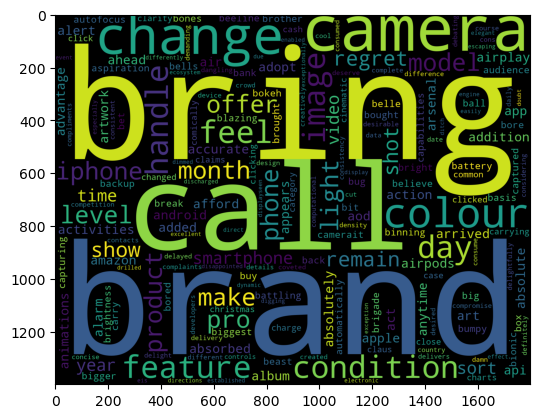

In [24]:
plt.imshow(wordcloud)

In [25]:
with open(r"C:\Users\mjais\OneDrive\Desktop\positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [26]:
positive_words = positive_words[35:]

In [27]:
with open(r"C:\Users\mjais\OneDrive\Desktop\negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [28]:
negative_words = negative_words[35:]

In [29]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [30]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [31]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [32]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

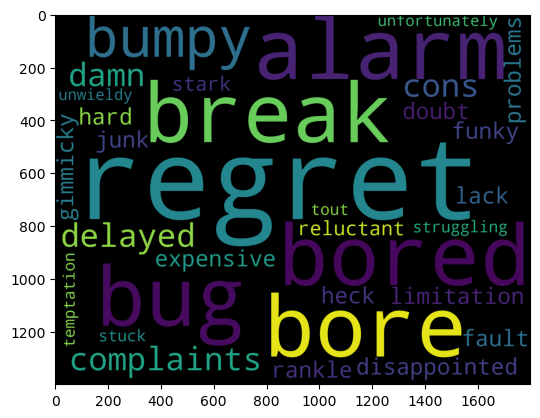

In [33]:
plt.imshow(wordcloud_neg)

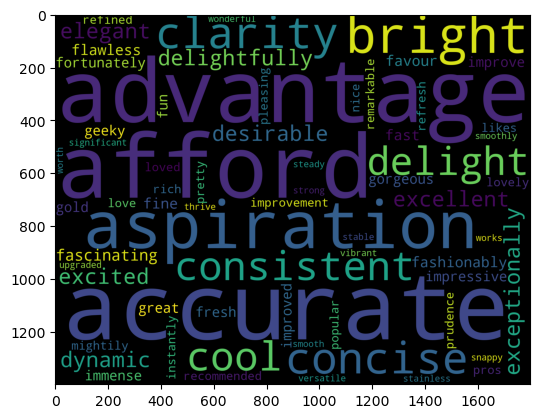

In [34]:
plt.imshow(wordcloud_pos)